In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [124]:
data = pd.read_csv('Project3.csv')
data=data.drop(['ID','Sex','Marital status','Education','Occupation','Settlement size'],axis=1)
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)
data = (data-mean)/std

In [125]:
def compute_seeds_change(s1, s2):
    seeds_change = 0
    for i in range(0, len(s1)):
        dist = np.sum(np.square(s1[i]-s2[i]))
        seeds_change += max(seeds_change, dist)
    seeds_change /= len(s1)
    return seeds_change


In [137]:
k = 5
eps = 1e-2
cluster_id = [-1]*len(data)
seed_indices = np.floor(np.random.rand(k)*(len(data)-1))
seeds = [0]*k
for i in range(0, k):
    seeds[i] = data.loc[seed_indices[i]:seed_indices[i]].values

while(1):
    seeds_prev = seeds
    seeds = [0]*k
    bin_size = [0]*k
    for i in range(0, len(data)):
        min_dist = 1e18
        best_cluster = -1
        for j in range(0, k):
            dist = np.sum(np.square(data.loc[i:i].values-seeds_prev[j]))
            if dist < min_dist:
                min_dist = dist
                best_cluster = j
        cluster_id[i] = best_cluster
        seeds[best_cluster] += data.loc[i:i].values
        bin_size[best_cluster] += 1

    for i in range(0, k):
        seeds[i] = seeds[i]/bin_size[i]
    seeds_change = compute_seeds_change(seeds_prev, seeds)
    if seeds_change < eps:
        break


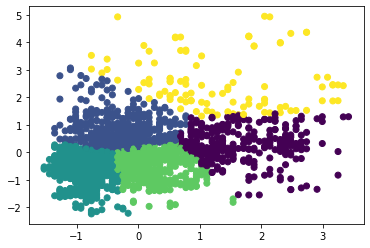

In [138]:
plt.scatter(data['Age'].values,data['Income'].values,c=cluster_id)

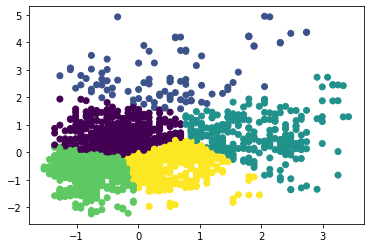

In [134]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(data)
plt.scatter(data['Age'].values,data['Income'].values,c=kmeans.labels_)